# **Ankara Turkey Student Success**
## EDA turkiye-student-evaluation_generic.csv
* The dataset has 5820 rows and 33 columns
* Each row consists 2 parts: a class characteristics and evaluation about a class scaled from 1 to 5
* The 'instr', 'class', 'nb.repeat', and 'attendance' columns are course characteristics
* The 'difficulty', 'Q1' to 'Q28' are evaluation scored by students
* All values are descrete numerical variables

In [1]:
#### Import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# import chart_studio.plotly as py
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Set pd.options to add slide bars
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Set default title color
plt.style.use('fivethirtyeight')
plt.rcParams.update({'text.color': "#333333", 
                     'axes.labelcolor': "#333333", 'axes.labelweight': 'bold', 
                     'xtick.labelcolor':"#333333", 'ytick.labelcolor':"#333333"})
plt.rcParams["font.weight"] = "bold"

## **Load Dataset - turkiye-student-evaluation_generic.csv**
* turkiye-student-evaluation_generic.csv

In [4]:
df_turkiye = pd.read_csv('data/turkiye-student-evaluation_generic.csv')

In [5]:
df_turkiye.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [6]:
col_names =['col_name', 'description']
df_turkiye_questions = pd.read_csv('data/turkiye-student-evaluation_generic_questions.csv', sep=':', names=col_names)

In [7]:
df_turkiye_questions.head()

,col_name,description
0,instr,Instructor's identifier; values taken from {1...
1,class,Course code (descriptor); values taken from {...
2,repeat,Number of times the student is taking this co...
3,attendance,Code of the level of attendance; values from ...
4,difficulty,Level of difficulty of the course as perceive...


In [8]:
df_turkiye_questions.shape

(35, 2)

## **Basic Stats**

* Values in all features are descrete numerical values
* Features have 3 to 5 unique values except for 'class', which has 13 unique values
* The dataset has no missing values
* The mean and standard deviation of the columns from 'difficulty' to 'Q28' are very close 

In [9]:
df_turkiye.shape

(5820, 33)

In [10]:
df_turkiye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [11]:
df_turkiye.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
# Check unique values
for col in df_turkiye.columns:
    print(f"{col} has {df_turkiye[col].nunique()} values\n{df_turkiye[col].unique()}\n")

instr has 3 values
[1 2 3]

class has 13 values
[ 2  7 10  1  6 11 13  3  4  5  8  9 12]

nb.repeat has 3 values
[1 3 2]

attendance has 5 values
[0 1 2 3 4]

difficulty has 5 values
[4 3 1 2 5]

Q1 has 5 values
[3 5 1 4 2]

Q2 has 5 values
[3 5 1 4 2]

Q3 has 5 values
[3 5 1 4 2]

Q4 has 5 values
[3 5 1 4 2]

Q5 has 5 values
[3 5 1 4 2]

Q6 has 5 values
[3 5 1 4 2]

Q7 has 5 values
[3 5 1 4 2]

Q8 has 5 values
[3 5 1 4 2]

Q9 has 5 values
[3 5 1 4 2]

Q10 has 5 values
[3 5 1 4 2]

Q11 has 5 values
[3 5 1 4 2]

Q12 has 5 values
[3 5 1 4 2]

Q13 has 5 values
[3 5 1 4 2]

Q14 has 5 values
[3 5 1 4 2]

Q15 has 5 values
[3 5 1 4 2]

Q16 has 5 values
[3 5 1 4 2]

Q17 has 5 values
[3 5 1 4 2]

Q18 has 5 values
[3 5 1 4 2]

Q19 has 5 values
[3 5 1 4 2]

Q20 has 5 values
[3 5 1 4 2]

Q21 has 5 values
[3 5 1 4 2]

Q22 has 5 values
[3 5 1 4 2]

Q23 has 5 values
[3 5 1 4 2]

Q24 has 5 values
[3 5 1 4 2]

Q25 has 5 values
[3 5 1 4 2]

Q26 has 5 values
[3 5 1 4 2]

Q27 has 5 values
[3 5 1 4 2]

Q28

## **Exploratory Data Analysis - Univeriate Analysis**
* The distribution of features are not normal

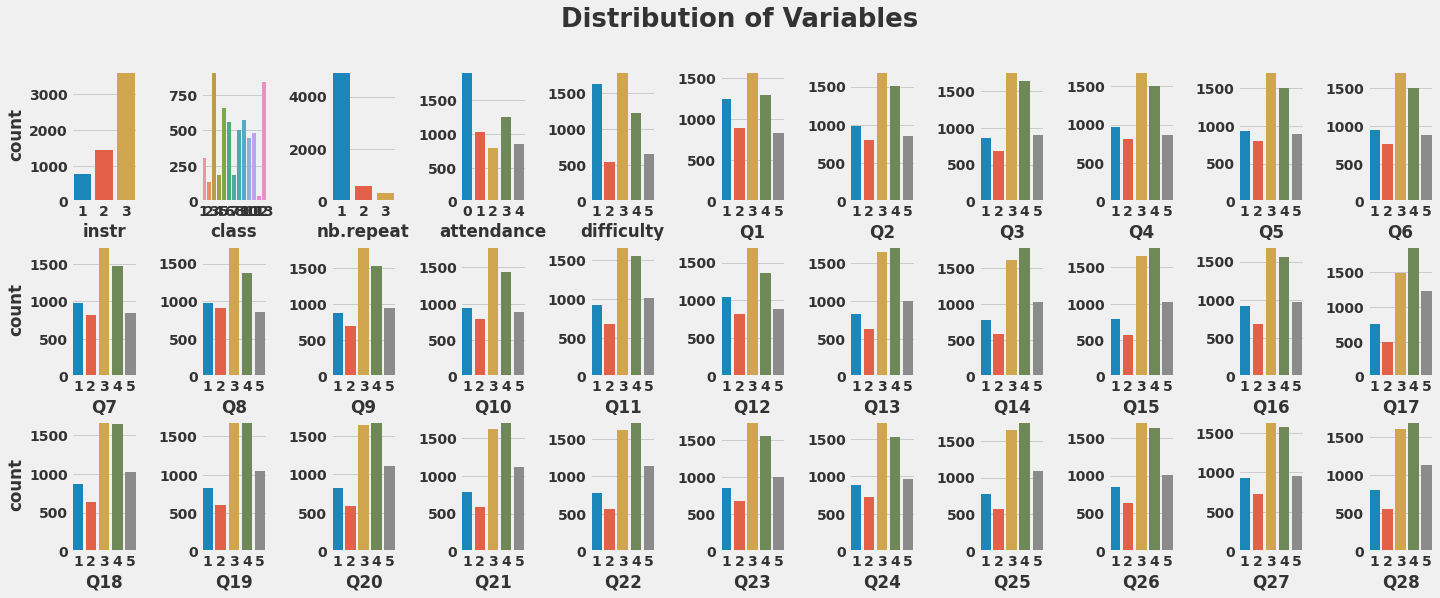

In [13]:
# Plot variable distribution
cols_to_plot = df_turkiye.columns
r = 3
c = 11
fig, ax =  plt.subplots(r, c, figsize=(20, 8))
plt.suptitle("Distribution of Variables", y=1, fontsize=26, fontweight='bold')
plt.tight_layout(pad=1, h_pad=1.2, w_pad=1)
for i in range(len(cols_to_plot)):
    sns.countplot(df_turkiye[cols_to_plot[i]], ax=ax[i//c, i%c]);
    if i % c != 0:
        ax[i//c, i%c].set_ylabel("")

### Check each value count in each variable and its ratio
* The distribution of the columns from 'Q1' to 'Q28' are similar shape: 3 and 4 have the most counts while 1, 2, and 5 have only about half or 2/3 
* Over 60% of responses is for the instructor #3.
* About 85% of responses are from the first time participant in a particular class
* About 1/3 of students don't participate a particular class at all

In [14]:
# Function to return a dataframe with value counts and ratio
def get_counts(df, col):
    temp = df.value_counts(col)
    ratio = temp / len(df) * 100
    df_copy = pd.DataFrame(temp, columns=[col])
    df_copy['ratio'] = ratio
    avg = round(len(df)/len(df_copy), 2)
    return df_copy, avg

In [15]:
# Function to draw barchart and print the ratio
def draw_barplot(df, col, avg):
    fig = go.Figure() 
    fig.add_trace(go.Bar(x=df.index, y=df[col], 
                         text=df['ratio'],
                         texttemplate='%{text:.2f}%'))
   
    fig.add_hline(y=avg, line_width=2, line_dash="dash", line_color="red")
    fig.add_annotation(text='Average: '+str(avg), font=dict(size=12), y=avg+avg*0.1)
                                
    fig.update_layout(width=600, height=400, 
                      xaxis=dict(title_text=col.capitalize(),
                                 tickvals=df.index),
                      yaxis=dict(title_text="Number of Student"),
                                 title=dict(text=f"Number by {col.capitalize()}", 
                                 font=dict(size=20), 
                                 yref='paper'))
    fig.show()

In [16]:
# Draw barplots for 'instr', 'class', 'nb.repeat', 'attendance', 'difficulty' 
cols_to_plot = ['instr', 'class', 'nb.repeat', 'attendance', 'difficulty']
df_counts = []
avgs = []

for col in cols_to_plot:
    df, avg = get_counts(df_turkiye, col)
    df_counts.append(df)
    avgs.append(avg)

for i in range(len(cols_to_plot)):
    draw_barplot(df_counts[i], cols_to_plot[i], avgs[i])

In [17]:
# Average score by questions
questions = df_turkiye.iloc[:, 5:]
average_score = questions.mean(axis=0)
overall_average_score = average_score.mean()

In [18]:
overall_average_score = round(average_score.mean(), 2)

fig = px.bar(x=average_score.index, y=average_score.values, title='Average Score by Question')

fig.update_layout(width=800, height=400, 
                    xaxis=dict(title_text="Questions"),
                    yaxis=dict(title_text="Average Score"),
                               font=dict(size=20))
fig.add_hline(y=overall_average_score, line_width=2, line_dash="dash", line_color="red")   
fig.add_annotation(text='Average: '+str(overall_average_score), font=dict(size=12), xref="paper", yref="paper", x=0.5, y=0.9)

fig.show()

In [19]:
# Average score by individual
avg_by_student = questions.mean(axis=1).sort_values()

fig = px.bar(y=avg_by_student.values, title="Average Score by Students' Responce")

fig.update_layout(width=1000, height=400, 
                  xaxis=dict(title_text=""),
                  yaxis=dict(title_text="Average Score by Student"), font=dict(size=20))

fig.update_traces(marker_color = 'purple')
fig.update_xaxes(showticklabels=False)

fig.add_hline(y=overall_average_score, line_width=2, line_dash="dash")   
fig.add_annotation(text='Average: '+str(overall_average_score), font=dict(size=12), xref="paper", x=0.5, y=overall_average_score)

fig.show()

## **Exploratory Data Analysis - Bivariate Analysis**
* Instructor #3 received a lower than the average score for all questions
* The first timeer, nb.repeat_1 left a higher than average score while the repeaters, nb.repeat_2 and 3's scores are below average
* The attendance_0 and attendance_1 left a lower than average score
* difficulty_1 and difficulty_5 left a lower than average score

### Average Question Score by Elements of 'instr', 'class', 'nb.repeat', 'attendance', 'difficulty'

In [46]:
# Create dataframes with Q1 to Q28 as index, their average scores as values and each column's values as columns
cols_to_plot = ['instr', 'class', 'nb.repeat', 'attendance', 'difficulty']
dfs_t= []
dfs= []
avgs = []
avgs_t = []

for i in range(len(cols_to_plot)):
    questions = df_turkiye.loc[:, 'Q1':'Q28']
    questions[cols_to_plot[i]] = df_turkiye[cols_to_plot[i]]
    temp = questions.groupby(cols_to_plot[i]).mean()
    dfs.append(temp)
    dfs_t.append(temp.T)
    avg = temp.mean(axis=1)
    avgs.append(avg)
    avg_t = temp.T.mean(axis=1)
    avgs_t.append(avg_t)

In [47]:
# Draw barplots to show the average score by 'instr', 'class', 'nb.repeat', 'attendance', 'difficulty'
for i in range(len(dfs)):
    fig = go.Figure()
    bar = go.Bar(x=dfs[i].index, y=avgs[i])
    fig.add_trace(bar)
    fig.update_layout(width=600, height=400, 
                      title=dict(text=f'Average Question Score by {cols_to_plot[i].capitalize()}', font=dict(size=20)),
                      xaxis=dict(title=f'{cols_to_plot[i].capitalize()}', tickvals=dfs[i].index),
                      yaxis=dict(title='Average Score'))

    fig.show()

### Average Question Score by Elements of 'instr', 'class', 'nb.repeat', 'attendance', 'difficulty' by Question
* Instructor #3 has lower average score for all questions while instructor # 1 and 2 have a higher than average score 
* Class #7 and #8 show opposite pattern in Q5 through Q9
* The first time of attendance, nb.repeat 1 has a higher than the average score
* Attendance 3 and 4 have the similar score values and higher than the average
* Difficulty 1 and 5 have a lower than the average score

In [22]:
# Draw lineplots to show the average score for Q1 to QQ28 for 'instr', 'class', 'nb.repeat', 'attendance', 'difficulty'
for i in range(len(dfs_t)):
    fig = go.Figure()
    for j in range(len(dfs_t[i].columns)):
        line_plot = go.Scatter(x=dfs_t[i].index, y=dfs_t[i].iloc[:, j], mode='lines+markers', name=f"{cols_to_plot[i]}_{dfs_t[i].columns[j]}")
        fig.add_trace(line_plot)
    avg_line = go.Scatter(x=dfs_t[i].index, y=avgs_t[i], mode='lines', name='Average Score', line_width=4, line_dash="dot", line_color="black")
    fig.add_traces(avg_line)
    fig.update_layout(title=dict(text=f'Average Question Score by {cols_to_plot[i].capitalize()}', font=dict(size=20)),
                        xaxis_title='Question',
                        yaxis_title='Average score')
    fig.show()

### Average Question Score by the Combination of 'instr' and 'class'
Instructor 1 has 3 classes, instructor 2 has 4 classes and instructor

In [23]:
# 'instr' by 'class'
df_instr_class = df_turkiye[['instr', 'class']]
unique_combination = set(zip(df_turkiye['instr'], df_turkiye['class']))

df_instr_class['instr_class'] = list(zip(df_turkiye['instr'], df_turkiye['class']))

# Average score by responce
avg_responce = df_turkiye.loc[:, 'Q1':'Q28'].mean(axis=1)
df_instr_class['avg_responce'] = avg_responce

df_instr_class_avg = df_instr_class.groupby('instr_class')[['avg_responce']].mean().reset_index()

In [48]:
# Draw barplots to show the average score by 'instr' and 'class' combination
fig = go.Figure()
fig.update_layout(width=800, height=400, 
                  title=dict(text='Average Question Score by Instructor and Class Combination', font=dict(size=20)),
                  xaxis=dict(title='Instructor and Class Combination', 
                             tickvals=df_instr_class_avg.index, 
                             ticktext=df_instr_class_avg['instr_class']),
                  yaxis=dict(title='Average Score'))

bar = go.Bar(x=df_instr_class_avg.index, 
             y=df_instr_class_avg['avg_responce'], 
             text=df_instr_class_avg['avg_responce'], 
             texttemplate='%{text:.2f}')
fig.add_trace(bar)

fig.show()

## **Check Correlation of Variables**
* 'Q13' to 'Q28' are highly correlated
* 'difficulty' and 'attendance' has a correlation of 0.44

In [29]:
corr_turkie = df_turkiye.corr()

In [30]:
# Draw heatmap
fig = px.imshow(corr_turkie)
fig.update_layout(width=800, height=800, 
                title=dict(text="Correlation Coefficient", font=dict(size=22)))

fig.show()